In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Given
i1= .05 
i2= .03
o1= -.01 
o2= .09 
b1= -.25 
b2= .16 
w1= .15 
w2= .20 
w3= -.02 
w4= .30 
w5= -.14 
w6= .45 
w7= -.15 
w8= .55 

In [3]:
i1

0.05

In [4]:
def sig(x):
    return 1/(1+np.exp(-x))

In [5]:
sig(0)

0.5

# Forward Pass

In [7]:
net_h1 = i1*w1 + i2*w2 + b1
h1 = sig(net_h1)
h1

0.4411490501347074

In [8]:
net_h2 = i1*w3 + i2*w4 + b1
h2 = sig(net_h2)
h2

0.4397935411918067

In [9]:
net_o1 = h1*w5 + h2*w6 + b2
out1 = sig(net_o1)
out1

0.5735001606713042

In [10]:
net_o2 = h2*w8 + h1*w7 + b2
out2 = sig(net_o2)
out2

0.5831490499840167

In [23]:
E = 1/2 *((o1 - out1)**2 + (o2 - out2)**2)
E

0.291834211501788

# Backpropogation

In [40]:
def sig_dev(x):
    return x * (1 - x)

In [80]:
delta_o1 = (out1 - o1) * sig_dev(out1)
delta_o1

0.14272281264331985

In [82]:
delta_o2 = (out2 - o2) * sig_dev(out2)
delta_o2

0.11987774609448444

In [84]:
dw5 = delta_o1 * h1
dw5

0.06296203323015435

In [86]:
dw6 = delta_o1 * h2
dw6

0.06276857118126039

In [88]:
dw7 = delta_o2 * h1
dw7

0.05288395382187144

In [90]:
dw8 = delta_o2 * h2
dw8

0.052721458464985584

In [92]:
db2 = delta_o1 + delta_o2
db2

0.2626005587378043

In [94]:
dw1 = i1 * (delta_o1*w5 + delta_o2*w7) * sig_dev(h1)
dw1

-0.00047883921378334563

In [96]:
dw2 = i2 * (delta_o1*w5 + delta_o2*w7) * sig_dev(h1)
dw2

-0.0002873035282700073

In [98]:
dw3 = i1 * (delta_o1*w6 + delta_o2*w8) * sig_dev(h2)
dw3

0.0015925482812713864

In [100]:
dw4 = i2 * (delta_o1*w6 + delta_o2*w8) * sig_dev(h2)
dw4

0.0009555289687628318

In [120]:
db1 = (delta_o1*w5 + delta_o2*w7) * sig_dev(h1) + (delta_o1*w6 + delta_o2*w8) * sig_dev(h2)
db1

-0.0006006131145383862

In [122]:
# update weights
lr = 0.5
w1 -= lr * dw1
w2 -= lr * dw2
w3 -= lr * dw3
w4 -= lr * dw4
w5 -= lr * dw5
w6 -= lr * dw6
w7 -= lr * dw7
w8 -= lr * dw8
b1 -= lr * db1
b2 -= lr * db2

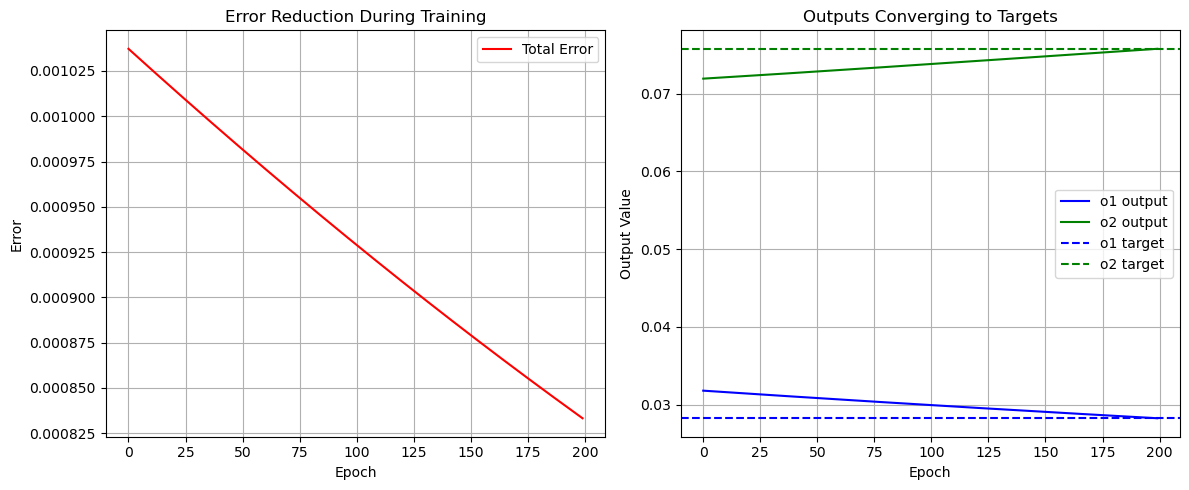

In [126]:
errors = []
outputs_o1 = []
outputs_o2 = []
epochs = 200
for i in range(epochs):
    net_h1 = i1*w1 + i2*w2 + b1
    h1 = sig(net_h1)
    net_h2 = i1*w3 + i2*w4 + b1
    h2 = sig(net_h2)
    net_o1 = h1*w5 + h2*w6 + b2
    out1 = sig(net_o1)
    net_o2 = h2*w8 + h1*w7 + b2
    out2 = sig(net_o2)
    E = 1/2 *((o1 - out1)**2 + (o2 - out2)**2)
    errors.append(E)
    outputs_o1.append(out1)
    outputs_o2.append(out2)
    
    delta_o1 = (out1 - o1) * sig_dev(out1)
    delta_o2 = (out2 - o2) * sig_dev(out2)
    dw5 = delta_o1 * h1  
    dw6 = delta_o1 * h2
    dw7 = delta_o2 * h1
    dw8 = delta_o2 * h2
    db2 = delta_o1 + delta_o2
    dw1 = i1 * (delta_o1*w5 + delta_o2*w7) * sig_dev(h1)
    dw2 = i2 * (delta_o1*w5 + delta_o2*w7) * sig_dev(h1)
    dw3 = i1 * (delta_o1*w6 + delta_o2*w8) * sig_dev(h2)
    dw4 = i2 * (delta_o1*w6 + delta_o2*w8) * sig_dev(h2)
    db1 = (delta_o1*w5 + delta_o2*w7) * sig_dev(h1) + (delta_o1*w6 + delta_o2*w8)
    lr = 0.5
    w1 -= lr * dw1
    w2 -= lr * dw2
    w3 -= lr * dw3
    w4 -= lr * dw4
    w5 -= lr * dw5
    w6 -= lr * dw6
    w7 -= lr * dw7
    w8 -= lr * dw8
    b1 -= lr * db1
    b2 -= lr * db2
    

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(epochs), errors, label="Total Error", color="red")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Error Reduction During Training")
plt.legend()
plt.grid(True)

# 2) Outputs vs Targets
plt.subplot(1,2,2)
plt.plot(range(epochs), outputs_o1, label="o1 output", color="blue")
plt.plot(range(epochs), outputs_o2, label="o2 output", color="green")
plt.axhline(y=out1, color="blue", linestyle="--", label="o1 target")
plt.axhline(y=out2, color="green", linestyle="--", label="o2 target")
plt.xlabel("Epoch")
plt.ylabel("Output Value")
plt.title("Outputs Converging to Targets")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [132]:
# Final values
print("\nFinal Weights & Biases (after training):")
print("w1=%.5f w2=%.5f w3=%.5f w4=%.5f" % (w1, w2, w3, w4))
print("w5=%.5f w6=%.5f w7=%.5f w8=%.5f" % (w5, w6, w7, w8))
print("b1=%.5f b2=%.5f" % (b1, b2))
print("Final outputs: o1=%.5f (target=%.2f), o2=%.5f (target=%.2f)" % (out1, o1, out2, o2))
print("Final Total Error =", round(E,5))


Final Weights & Biases (after training):
w1=0.17179 w2=0.21307 w3=-0.02098 w4=0.29941
w5=-1.25030 w6=-0.51222 w7=-0.26430 w8=0.48263
b1=0.08304 b2=-2.61479
Final outputs: o1=0.02826 (target=-0.01), o2=0.07576 (target=0.09)
Final Total Error = 0.00083
